In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils.utils import compute_A_norm

In [2]:
Nx=128
Ny=128

Lx=128
Ly=128
T_end=1
dt=0.008

input_to_defect_ratio_sqrt=8*8
N_ITERATIONS = int(T_end / dt)
A_norm, A_original, mem_rate, myu_original = compute_A_norm(
    Nx=Nx, 
    Ny=Ny, 
    input_to_defect_ratio=input_to_defect_ratio_sqrt*input_to_defect_ratio_sqrt, 
    mean=1, 
    std_deviation=0, 
    time_period=10, 
    Lx=Lx, 
    Ly=Ly, 
    dt=dt, 
    T_End=T_end, 
    parallel_runs=1, 
    input_scale=100, 
    mem_coef=1, 
    time_period_parameter=15, 
    _mean=6.7, 
    std_deviation_run_computation=1,
    input_myu=None
)

  0%|          | 0/125 [00:00<?, ?it/s]

100%|██████████| 125/125 [00:00<00:00, 299.61it/s]

A.shape=(1, 125, 128, 128),
Myu.shape=(1, 125, 128, 128),

Any NaN values in Myu		 False
Any NaN values in A_original	 False


In [3]:
ms_coef = (1 / np.sqrt(np.max(A_original.real) ** 2 + np.max(A_original.imag) ** 2)) * 0.3

In [4]:
a_normalized = A_original * ms_coef

In [5]:
myu_original[0, 124, :, :]

array([[110.1960953 , 110.1960953 , 110.1960953 , ..., 111.52773528,
        111.52773528, 111.52773528],
       [110.1960953 , 110.1960953 , 110.1960953 , ..., 111.52773528,
        111.52773528, 111.52773528],
       [110.1960953 , 110.1960953 , 110.1960953 , ..., 111.52773528,
        111.52773528, 111.52773528],
       ...,
       [ 66.73136829,  66.73136829,  66.73136829, ...,  63.73015209,
         63.73015209,  63.73015209],
       [ 66.73136829,  66.73136829,  66.73136829, ...,  63.73015209,
         63.73015209,  63.73015209],
       [ 66.73136829,  66.73136829,  66.73136829, ...,  63.73015209,
         63.73015209,  63.73015209]])

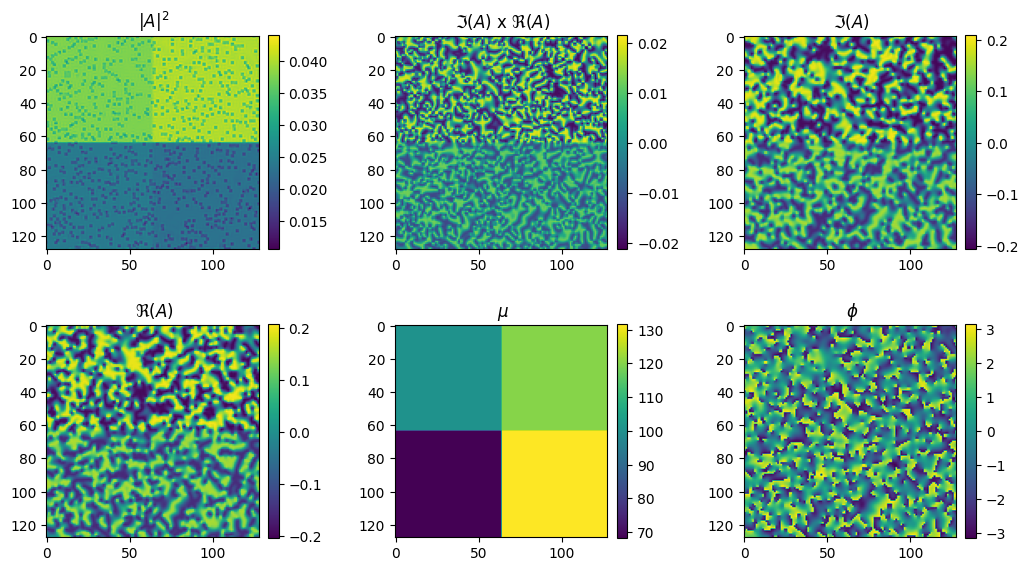

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
plt.subplots_adjust(wspace=0.5, hspace=-0.4)

im1 = axs[0, 0].imshow(np.abs(a_normalized[0, 124, :, :]) ** 2)
axs[0, 0].set_title(r" $|A|^2$ ")
axs[0, 0].title.set_position([.5, 1.05])

im2 = axs[0, 1].imshow(a_normalized[0, 124, :, :].real * a_normalized[0, 124, :, :].imag)
axs[0, 1].set_title(r" $\Im{(A)}$ x $\Re{(A)}$ ")
axs[0, 1].title.set_position([.5, 1.05])

im3 = axs[0, 2].imshow(a_normalized[0, 124, :, :].imag)
axs[0, 2].set_title(r" $\Im{(A)}$ ")
axs[0, 2].title.set_position([.5, 1.05])

im4 = axs[1, 0].imshow(a_normalized[0, 124, :, :].real)
axs[1, 0].set_title(r" $\Re{(A)}$ ")
axs[1, 0].title.set_position([.5, 1.05])

im5 = axs[1, 1].imshow(myu_original[0, 100, :, :])
axs[1, 1].set_title(r" $\mu$ ")
axs[1, 1].title.set_position([.5, 1.05])

im6 = axs[1, 2].imshow(np.angle(A_original[0, 124, :, :]))
axs[1, 2].set_title(r" $\phi$ ")
axs[1, 2].title.set_position([.5, 1.05])

fig.colorbar(im1, ax=axs[0, 0], fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=axs[0, 1], fraction=0.046, pad=0.04)
fig.colorbar(im3, ax=axs[0, 2], fraction=0.046, pad=0.04)
fig.colorbar(im4, ax=axs[1, 0], fraction=0.046, pad=0.04)
fig.colorbar(im5, ax=axs[1, 1], fraction=0.046, pad=0.04)
fig.colorbar(im6, ax=axs[1, 2], fraction=0.046, pad=0.04)

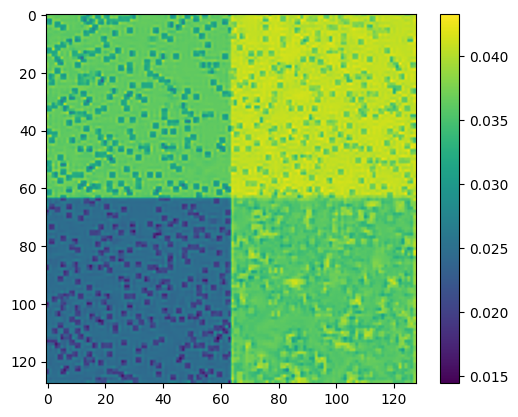

In [7]:
plt.imshow(a_normalized[0, 98, :, :].real ** 2 + a_normalized[0, 98, :, :].imag ** 2)
plt.colorbar()

##### $$n_x^2 + n_y^2 + n_z^2 \approx 1$$

In [8]:
a_normalized[0, 0, 0, 0].real ** 2 + a_normalized[0, 0, 0, 0].imag ** 2 + np.sqrt(1 - a_normalized[0, 0, 0, 0].real ** 2 - a_normalized[0, 0, 0, 0].imag ** 2)

1.000000192865902

In [9]:
y = np.arange(0, 128, 1)
x = np.arange(0, 128, 1)
X, Y = np.meshgrid(x, y)

In [10]:
n_x = np.real(a_normalized)
n_y = np.imag(a_normalized)

### Forward

In [11]:
theta = np.arcsin(np.sqrt(n_x ** 2 + n_y ** 2))
delta = theta ** 2 * (np.pi * 1 * 0.05) / 0.532
psi = np.arctan(n_y / n_x)

a = 0.5 * (1 + np.sin(delta) * np.sin(2 * psi))
b = 0.5 * (1 - np.sin(delta) * np.sin(2 * psi))
c = 0.5 * (1 + np.sin(delta) * np.cos(2 * psi))
d = 0.5 * (1 - np.sin(delta) * np.cos(2 * psi))

### Backward

In [12]:
delta2 = np.arcsin(np.sqrt((a - b) ** 2 + (c - d) ** 2))
psi2 = 0.5 * np.arctan2(-(b - a), (c - d))

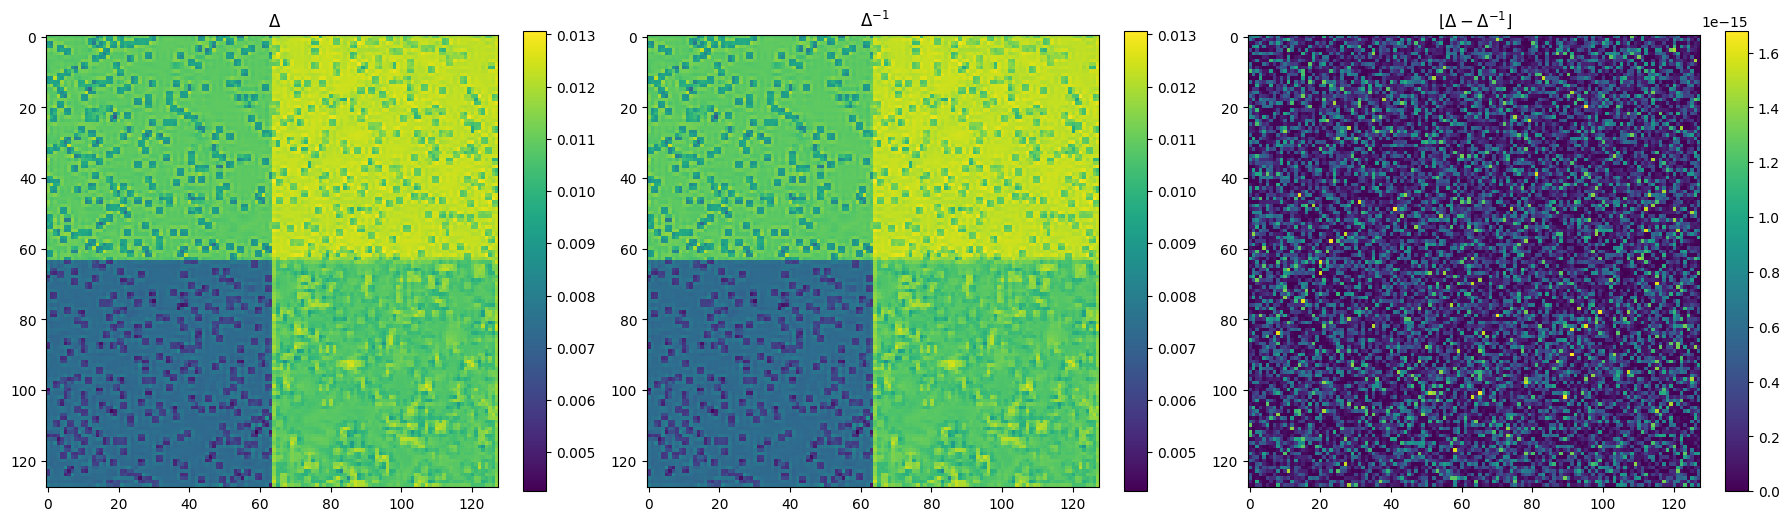

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 18))

im1 = axs[0].imshow(delta[0, 99, :, :])
axs[0].set_title(r" $\Delta$ ")

im2 = axs[1].imshow(delta2[0, 99, :, :])
axs[1].set_title(r" $\Delta^{-1}$ ")

im3 = axs[2].imshow(np.square(delta[0, 99, :, :] - delta2[0, 99, :, :]))
axs[2].set_title(r" $\lfloor\Delta - \Delta^{-1}\rfloor $ ")

fig.colorbar(im1, ax=axs[0], fraction=0.046)
fig.colorbar(im2, ax=axs[1], fraction=0.046)
fig.colorbar(im3, ax=axs[2], fraction=0.046)

plt.tight_layout()
plt.show()

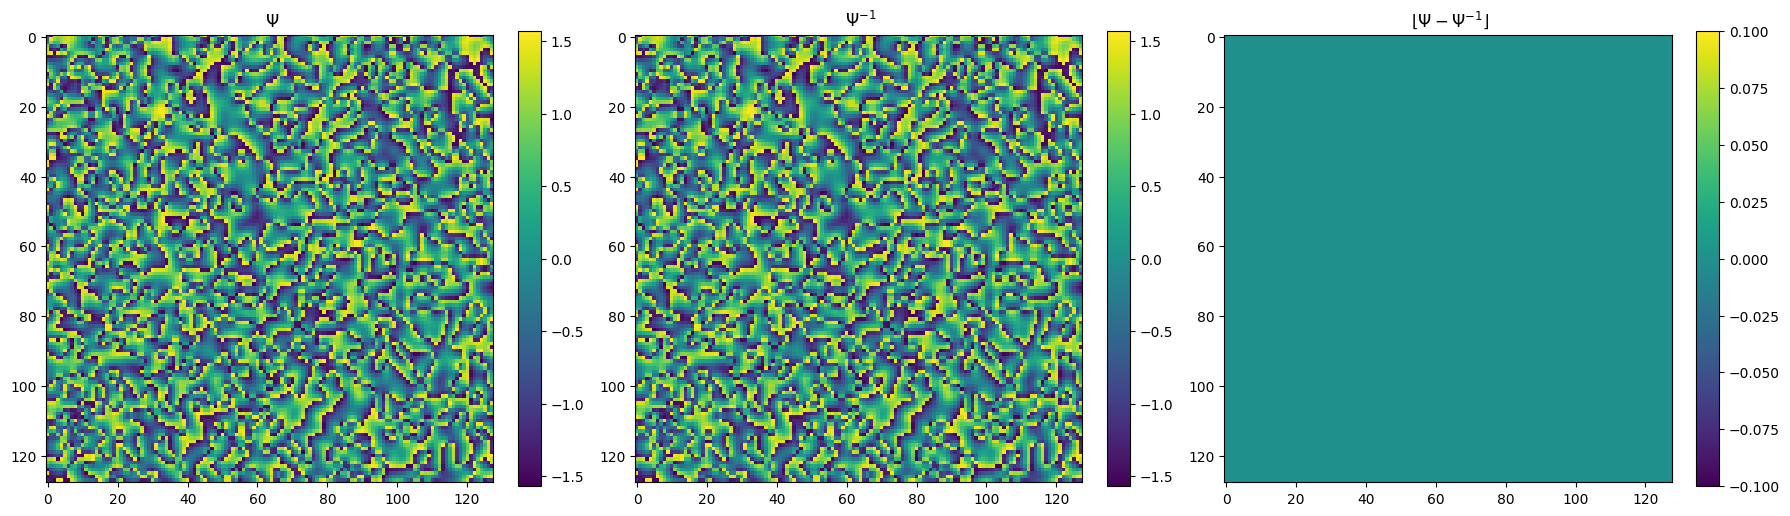

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(18, 18))

im1 = axs[0].imshow(psi[0, 99, :, :])
axs[0].set_title(r" $\Psi$ ")

im2 = axs[1].imshow(psi2[0, 99, :, :])
axs[1].set_title(r" $\Psi^{-1}$ ")

im3 = axs[2].imshow(np.round(psi[0, 99, :, :] - psi2[0, 99, :, :]))
axs[2].set_title(r" $\lfloor\Psi - \Psi^{-1}\rfloor $ ")

fig.colorbar(im1, ax=axs[0], fraction=0.046)
fig.colorbar(im2, ax=axs[1], fraction=0.046)
fig.colorbar(im3, ax=axs[2], fraction=0.046)

plt.tight_layout()
plt.show()

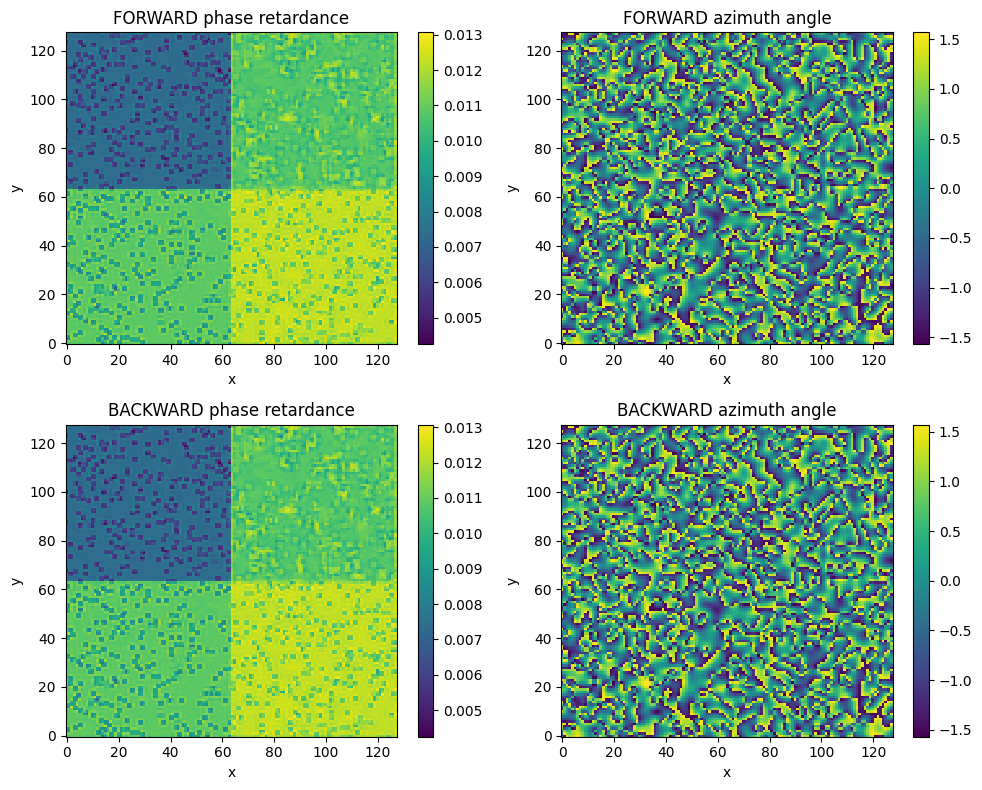

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].pcolor(X, Y, delta[0, 99, :, :], shading='auto')
axs[0, 0].set_title('FORWARD phase retardance')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
fig.colorbar(axs[0, 0].pcolor(X, Y, delta[0, 99, :, :], shading='auto'), ax=axs[0, 0])

axs[0, 1].pcolor(X, Y, psi[0, 99, :, :], shading='auto')
axs[0, 1].set_title('FORWARD azimuth angle')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
fig.colorbar(axs[0, 1].pcolor(X, Y, psi[0, 99, :, :], shading='auto'), ax=axs[0, 1])

axs[1, 0].pcolor(X, Y, delta2[0, 99, :, :], shading='auto')
axs[1, 0].set_title('BACKWARD phase retardance')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
fig.colorbar(axs[1, 0].pcolor(X, Y, delta2[0, 99, :, :], shading='auto'), ax=axs[1, 0])

axs[1, 1].pcolor(X, Y, psi2[0, 99, :, :], shading='auto')
axs[1, 1].set_title('BACKWARD azimuth angle')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
fig.colorbar(axs[1, 1].pcolor(X, Y, psi2[0, 99, :, :], shading='auto'), ax=axs[1, 1])

plt.tight_layout()
plt.show()


In [16]:
def create_field(psi, theta):
    n_x = np.cos(psi) * np.sin(theta)
    n_y = np.sin(psi) * np.sin(theta)
    return n_x + 1j * n_y

In [17]:
def get_theta(delta, k):
    return np.sqrt(delta / k)

In [18]:
theta_inv = get_theta(delta2, ((np.pi * 1 * 0.05) / 0.532))

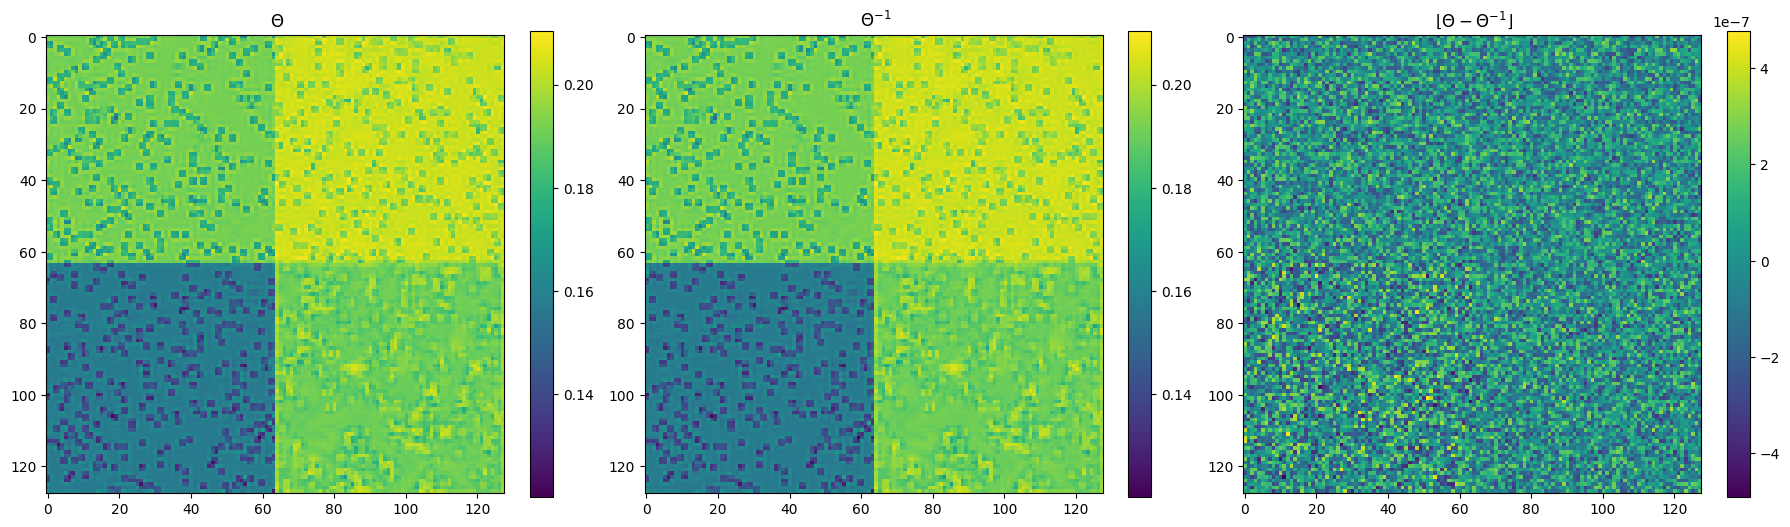

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 18))

im1 = axs[0].imshow(theta[0, 99, :, :])
axs[0].set_title(r" $\Theta$ ")

im2 = axs[1].imshow(theta_inv[0, 99, :, :])
axs[1].set_title(r" $\Theta^{-1}$ ")

im3 = axs[2].imshow(theta[0, 99, :, :] - theta_inv[0, 99, :, :])
axs[2].set_title(r" $\lfloor\Theta - \Theta^{-1}\rfloor $ ")

fig.colorbar(im1, ax=axs[0], fraction=0.046)
fig.colorbar(im2, ax=axs[1], fraction=0.046)
fig.colorbar(im3, ax=axs[2], fraction=0.046)

plt.tight_layout()
plt.show()

In [20]:
A_constructed = create_field(psi2, theta_inv)

In [21]:
A = create_field(psi, theta)

In [22]:
a_normalized[0, 99, 99, 99].real ** 2 + a_normalized[0, 99, 99, 99].imag ** 2 + np.cos(theta[0, 99, 99, 99]) ** 2 ** 2

0.9658027419985191

In [23]:
A_constructed[0, 99, 99, 99].real ** 2 + A_constructed[0, 99, 99, 99].imag ** 2 + np.cos(theta_inv[0, 99, 99, 99]) ** 2 ** 2

0.9658026196183691

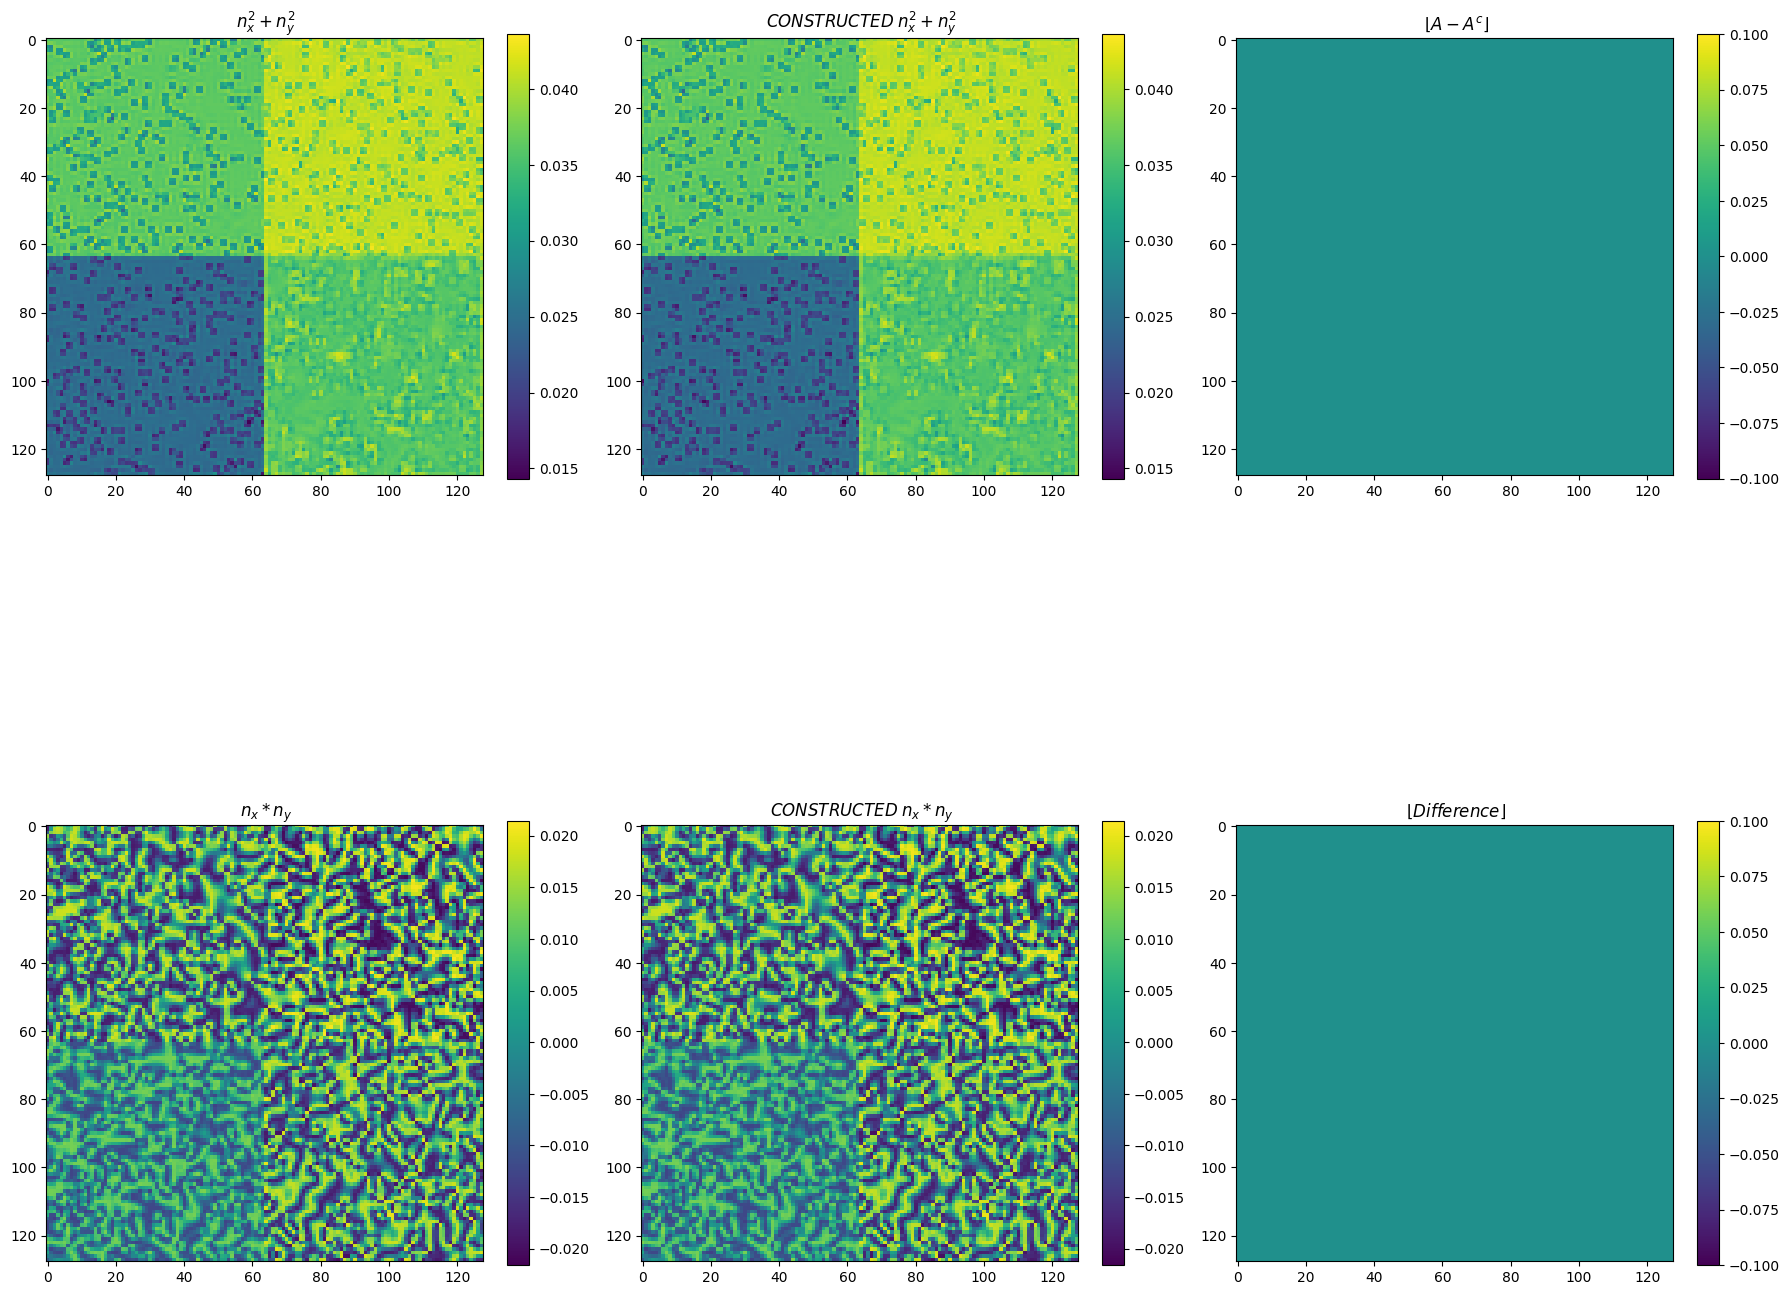

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(18, 18))

im1 = axs[0, 0].imshow(a_normalized[0, 99, :, :].real ** 2 + a_normalized[0, 99, :, :].imag ** 2)
axs[0, 0].set_title(r" $n_x^2 + n_y^2$ ")

im2 = axs[0, 1].imshow(A_constructed[0, 99, :, :].real ** 2 + A_constructed[0, 99, :, :].imag ** 2)
axs[0, 1].set_title(r" $CONSTRUCTED\;n_x^2 + n_y^2$ ")

im3 = axs[0, 2].imshow(np.round(a_normalized[0, 99, :, :].real ** 2 + a_normalized[0, 99, :, :].imag ** 2 - (A_constructed[0, 99, :, :].real ** 2 + A_constructed[0, 99, :, :].imag ** 2)))
axs[0, 2].set_title(r" $\lfloor A - A^{c}\rfloor $ ")


im4 = axs[1, 0].imshow(a_normalized[0, 99, :, :].real * a_normalized[0, 99, :, :].imag)
axs[1, 0].set_title(r" $n_x * n_y$ ")

im5 = axs[1, 1].imshow(A_constructed[0, 99, :, :].real * A_constructed[0, 99, :, :].imag)
axs[1, 1].set_title(r" $CONSTRUCTED\;n_x * n_y$ ")

im6 = axs[1, 2].imshow(np.round(a_normalized[0, 99, :, :].real * a_normalized[0, 99, :, :].imag - (A_constructed[0, 99, :, :].real * A_constructed[0, 99, :, :].imag)))
axs[1, 2].set_title(r" $\lfloor Difference \rfloor $ ")

fig.colorbar(im1, ax=axs[0, 0], fraction=0.046)
fig.colorbar(im2, ax=axs[0, 1], fraction=0.046)
fig.colorbar(im3, ax=axs[0, 2], fraction=0.046)
fig.colorbar(im4, ax=axs[1, 0], fraction=0.046)
fig.colorbar(im5, ax=axs[1, 1], fraction=0.046)
fig.colorbar(im6, ax=axs[1, 2], fraction=0.046)

plt.tight_layout()
plt.show()

In [25]:
pol_0 = np.load(r"C:\Users\Alex\Desktop\polarization_data_29_03\0_degrees_polarization_29_03.npy")
pol_45 = np.load(r"C:\Users\Alex\Desktop\polarization_data_29_03\45_degrees_polarization_29_03.npy")
pol_90 = np.load(r"C:\Users\Alex\Desktop\polarization_data_29_03\90_degrees_polarization_29_03.npy")
pol_135 = np.load(r"C:\Users\Alex\Desktop\polarization_data_29_03\135_degrees_polarization_29_03.npy")

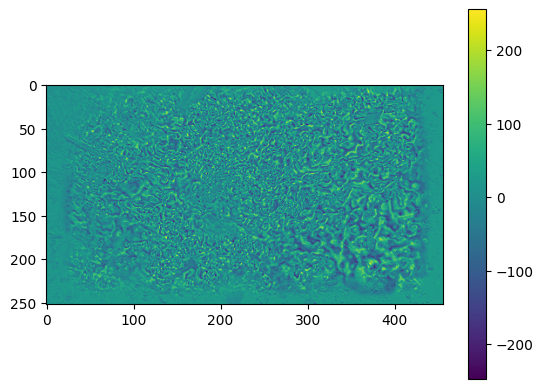

In [26]:
plt.imshow(pol_0[0, :, :] + pol_90[0, :, :] - pol_135[0, :, :] - pol_45[0, :, :])
plt.colorbar()

In [27]:
pol_0_normalized =   0.867 * pol_0 / (pol_0 + pol_90)
pol_90_normalized =  0.867 * pol_90 / (pol_0 + pol_90)
pol_45_normalized =  0.867 * pol_45 / (pol_135 + pol_45)
pol_135_normalized = 0.867 * pol_135 / (pol_135 + pol_45)

# a = 0, b = 90, c = 45, d = 135

In [28]:
delta2 = np.arcsin(np.sqrt((pol_0_normalized - pol_90_normalized) ** 2 + (pol_45_normalized - pol_135_normalized) ** 2))
psi2 = 0.5 * np.arctan2(-(pol_90_normalized - pol_0_normalized), (pol_45_normalized - pol_135_normalized))

In [29]:
np.isnan(delta2).sum()

0

In [30]:
theta_inv = get_theta(delta2, ((np.pi * 1 * 0.05) / 0.532))

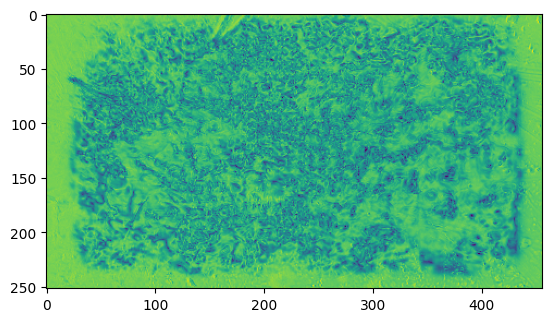

In [31]:
plt.imshow(theta_inv[0, :, :])

In [32]:
A = create_field(psi2, theta_inv)

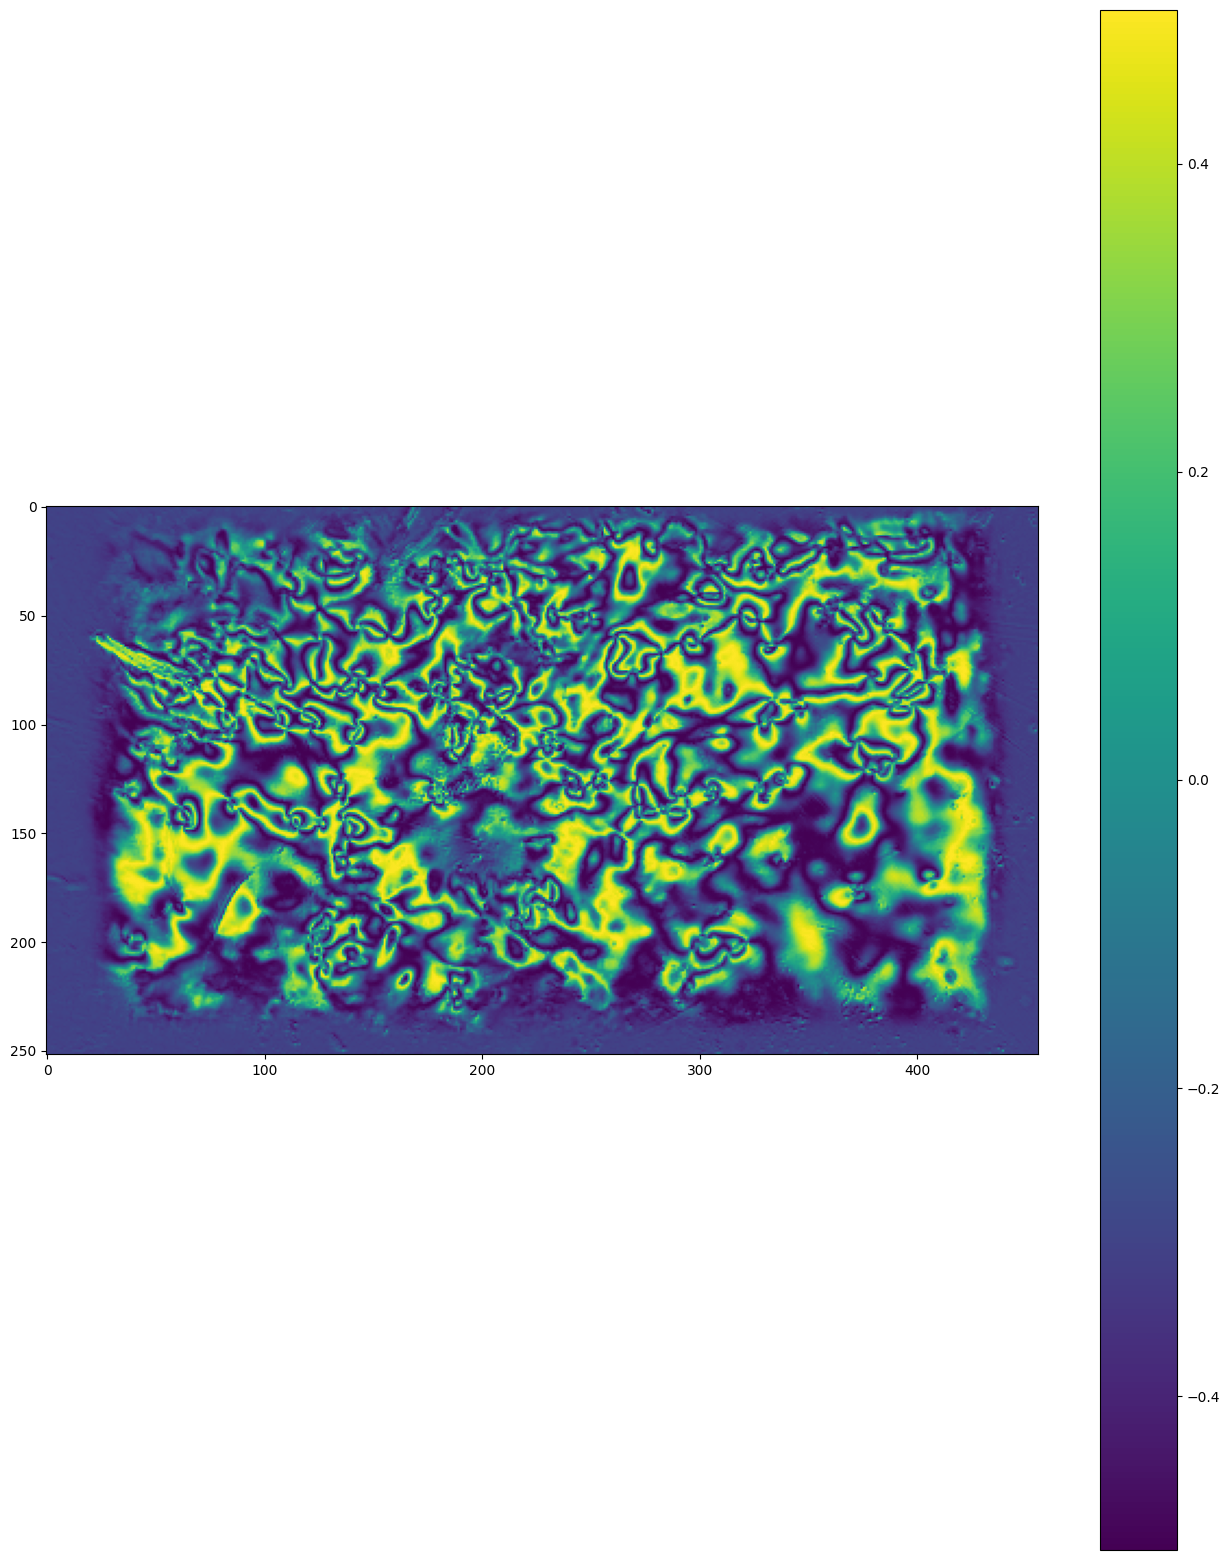

In [33]:
fig, axs = plt.subplots(figsize=(16, 20))
plt.imshow(A[299, :, :].real * A[299, :, :].imag)
plt.colorbar()

In [61]:
import numpy as np
import cv2
from concurrent.futures import ThreadPoolExecutor, as_completed
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from tqdm import tqdm
import os

In [62]:
def frames_to_video(frames: np.ndarray, path_for_video: str, length_of_video: float, fps: int = 30, save: bool = True):
    num_frames, height, width = frames.shape
    target_frames = int(length_of_video * fps)

    def process_frame(index, frame):
        fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=100)
        ax.imshow(frame, cmap='viridis')
        ax.axis('off')  # Remove ticks and labels
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove margins
        fig.canvas.draw()

        # Convert the Matplotlib figure to a numpy array
        frame_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        frame_image = frame_image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)

        # Save an intermediate image for debugging
        # plt.imsave(f'./debug/debug_frame_{index}.png', frame_image)

        return index, frame_image

    processed_frames = [None] * target_frames

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_frame, i, frames[i]) for i in range(target_frames)]
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing frames"):
            index, frame = future.result()
            processed_frames[index] = frame

    if save:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        video_writer = cv2.VideoWriter(path_for_video, fourcc, fps, (width, height))

        if not video_writer.isOpened():
            print(f"Error: The video file {path_for_video} could not be opened for writing.")
            return

        for frame in tqdm(processed_frames, desc="Writing frames to video"):
            if frame is not None:
                video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

        video_writer.release()

        # Debug: Check if the video file has been written correctly
        if not cv2.VideoCapture(path_for_video).isOpened():
            print(f"Error: The video file {path_for_video} could not be created.")
        else:
            print(f"Video file {path_for_video} has been successfully created.")

In [70]:
def frames_to_video(frames: np.ndarray, path_for_video: str, length_of_video: float, fps: int = 30, save: bool = True):
    num_frames, height, width = frames.shape
    target_frames = int(length_of_video * fps)

    def process_frame(index, frame):
        fig, ax = plt.subplots(figsize=(width / 100, height / 100), dpi=100)
        ax.imshow(frame, cmap='viridis')
        ax.axis('off')
        fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
        fig.canvas.draw()

        frame_image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
        frame_image = frame_image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)

        debug_image_path = os.path.join('debug_frames', f'debug_frame_{index}.png')
        os.makedirs(os.path.dirname(debug_image_path), exist_ok=True)
        plt.imsave(debug_image_path, frame_image)

        return index, frame_image

    processed_frames = [None] * target_frames

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_frame, i, frames[i]) for i in range(target_frames)]
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing frames"):
            index, frame = future.result()
            processed_frames[index] = frame

    if save:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Try a different codec
        video_writer = cv2.VideoWriter(path_for_video, fourcc, fps, (width, height))

        if not video_writer.isOpened():
            print(f"Error: The video file {path_for_video} could not be opened for writing.")
            return

        for frame in tqdm(processed_frames, desc="Writing frames to video"):
            if frame is not None:
                video_writer.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

        video_writer.release()

        # Debug: Check if the video file has been written correctly
        cap = cv2.VideoCapture(path_for_video)
        if not cap.isOpened():
            print(f"Error: The video file {path_for_video} could not be created.")
        else:
            print(f"Video file {path_for_video} has been successfully created.")
            cap.release()

In [71]:
frames_to_video(A.real * A.imag, 'tatev_video_expo.mp4', length_of_video=10, fps=30)

Writing frames to video: 100%|██████████| 300/300 [00:00<00:00, 42869.01it/s]

Error: The video file tatev_video_expo.mp4 could not be created.


In [74]:
def images_to_video(images_dir: str, output_video_path: str, fps: int = 30):
    image_files = [os.path.join(images_dir, img) for img in os.listdir(images_dir) if img.endswith(('png', 'jpg', 'jpeg'))]
    
    if not image_files:
        print(f"No images found in directory {images_dir}.")
        return

    first_frame = cv2.imread(image_files[0])
    height, width, _ = first_frame.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    if not video_writer.isOpened():
        print(f"Error: The video file {output_video_path} could not be opened for writing.")
        return

    for image_file in tqdm(image_files, desc="Writing images to video"):
        frame = cv2.imread(image_file)
        if frame is None:
            print(f"Error reading image {image_file}")
            continue
        video_writer.write(frame)

    video_writer.release()

    cap = cv2.VideoCapture(output_video_path)
    if not cap.isOpened():
        print(f"Error: The video file {output_video_path} could not be created.")
    else:
        print(f"Video file {output_video_path} has been successfully created.")
        cap.release()

In [76]:
def rename_images(images_dir: str):
    image_files = sorted([os.path.join(images_dir, img) for img in os.listdir(images_dir) if img.endswith(('png', 'jpg', 'jpeg'))])
    for i, image_file in enumerate(image_files):
        file_extension = os.path.splitext(image_file)[1]
        new_filename = os.path.join(images_dir, f'ID{i+1:05d}{file_extension}')
        os.rename(image_file, new_filename)

In [78]:
def dump_frames_to_folder(frames: np.ndarray, output_folder: str):
    os.makedirs(output_folder, exist_ok=True)
    num_frames = frames.shape[0]
    for i in tqdm(range(num_frames)):
        frame = frames[i]
        filename = os.path.join(output_folder, f'ID{i+1:05d}.png')
        plt.imsave(filename, frame, cmap='viridis')

In [79]:
dump_frames_to_folder(A.imag * A.real, 'output_test')

In [77]:
rename_images(r'C:\Users\Alex\Desktop\polarization\dev\debug_frames')

In [80]:
images_to_video(
    images_dir=r'C:\Users\Alex\Desktop\polarization\dev\output_test',
    output_video_path='tatev_video.mp4'
)

Writing images to video: 100%|██████████| 300/300 [00:02<00:00, 114.54it/s]


Video file tatev_video.mp4 has been successfully created.


In [81]:
from utils.visualization import create_single_video

In [82]:
len(A)

828

In [83]:
A.shape

(828, 248, 396)

In [84]:
create_single_video(
    memory_rate=len(A),
    video=A.imag * A.real,
    save=True,
    path_for_video="output_video_23_04_4_field.mp4",
    fps=60,
    title=" "
)

100%|██████████| 828/828 [01:42<00:00,  8.10it/s]


Video successfully saved at output_video_23_04_4_field.mp4
